## K_means_clustering
---
**Elo notes**

#### Clustering v. Classifying

Clustering algorithms in computational text analysis groups documents into what are called subsets or clusters where the algorithm's goal is to create internally coherent clusters that are distinct from one another. Classification on the other hand, is a form of supervised learning where the features of the documents are used to predict the "type" of documents.

#### Document clustering

Document clustering (or text clustering) is the application of cluster analysis to textual documents. It has applications in automatic document organization, topic extraction and fast information retrieval or filtering.

Document clustering involves the use of descriptors and descriptor extraction. 

Descriptors are sets of words that describe the contents within the cluster. Document clustering is generally considered to be a centralized process. Examples of document clustering include web document clustering for search users.

The application of document clustering can be categorized to two types, online and offline. Online applications are usually constrained by efficiency problems when compared to offline applications.

In general, there are two common algorithms. The first one is the hierarchical based algorithm, which includes single link, complete linkage, group average and Ward's method. By aggregating or dividing, documents can be clustered into hierarchical structure, which is suitable for browsing. However, such an algorithm usually suffers from efficiency problems. 

The other algorithm is developed using the K-means algorithm and its variants. Generally hierarchical algorithms produce more in-depth information for detailed analyses, while algorithms based around variants of the K-means algorithm are more efficient and provide sufficient information for most purposes.

These algorithms can further be classified as hard or soft clustering algorithms. Hard clustering computes a hard assignment – each document is a member of exactly one cluster. The assignment of soft clustering algorithms is soft – a document’s assignment is a distribution over all clusters. In a soft assignment, a document has fractional membership in several clusters.

Dimensionality reduction methods can be considered a subtype of soft clustering; for documents, these include latent semantic indexing (truncated singular value decomposition on term histograms) and topic models.

Other algorithms involve graph based clustering, ontology supported clustering and order sensitive clustering.

Given a clustering, it can be beneficial to automatically derive human-readable labels for the clusters. Various methods exist for this purpose.

#### Clustering in search engines

A web search engine often returns thousands of pages in response to a broad query, making it difficult for users to browse or to identify relevant information. Clustering methods can be used to automatically group the retrieved documents into a list of meaningful categories, as is achieved by e.g. open source software such as Carrot2.

#### Procedures

In practice, document clustering often takes the following steps:

1. Tokenization

Tokenization is the process of parsing text data into smaller units (tokens) such as words and phrases. Commonly used tokenization methods include Bag-of-words model and N-gram model.

2. Stemming and lemmatization

Different tokens might carry out similar information (e.g. tokenization and tokenizing). And we can avoid calculating similar information repeatedly by reducing all tokens to its base form using various stemming and lemmatization dictionaries.

3. Removing stop words and punctuation

Some tokens are less important than others. For instance, common words such as "the" might not be very helpful for revealing the essential characteristics of a text. So usually it is a good idea to eliminate stop words and punctuation marks before doing further analysis.

4. Computing term frequencies or tf-idf

After pre-processing the text data, we can then proceed to generate features. For document clustering, one of the most common ways to generate features for a document is to calculate the term frequencies of all its tokens. Although not perfect, these frequencies can usually provide some clues about the topic of the document. And sometimes it is also useful to weight the term frequencies by the inverse document frequencies. See tf-idf for detailed discussions.

5. Clustering

We can then cluster different documents based on the features we have generated. See the algorithm section in cluster analysis for different types of clustering methods.

6. Evaluation and visualization

Finally, the clustering models can be assessed by various metrics. And it is sometimes helpful to visualize the results by plotting the clusters into low (two) dimensional space. See multidimensional scaling as a possible approach.

#### Cluster labeling

In natural language processing and information retrieval, cluster labeling is the problem of picking descriptive, human-readable labels for the clusters produced by a document clustering algorithm; standard clustering algorithms do not typically produce any such labels. Cluster labeling algorithms examine the contents of the documents per cluster to find a labeling that summarize the topic of each cluster and distinguish the clusters from each other.

#### Differential cluster labeling

Differential cluster labeling labels a cluster by comparing term distributions across clusters, using techniques also used for feature selection in document classification, such as mutual information and chi-squared feature selection. Terms having very low frequency are not the best in representing the whole cluster and can be omitted in labeling a cluster. By omitting those rare terms and using a differential test, one can achieve the best results with differential cluster labeling.



In [30]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords

import nltk
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

% matplotlib inline

In [6]:
df = pd.read_pickle('data/articles.pkl')

In [7]:
df[:2]

,document_type,web_url,lead_paragraph,abstract,snippet,news_desk,word_count,source,section_name,subsection_name,_id,pub_date,print_page,headline,content
0,article,http://www.nytimes.com/2013/10/03/sports/footb...,You would think that in a symmetric zero-sum s...,None,You would think that in a symmetric zero-sum s...,Sports,347,The New York Times,Sports,Pro Football,524d4e3a38f0d8198974001f,2013-10-03T00:00:00Z,None,Week 5 Probabilities: Why Offense Is More Impo...,the original goal building model football fore...
1,article,http://www.nytimes.com/2013/10/03/us/new-immig...,House Democrats on Wednesday unveiled an immig...,House Democrats unveil immigration bill that p...,House Democrats on Wednesday unveiled an immig...,National,83,The New York Times,U.S.,None,524cf71338f0d8198973ff7b,2013-10-03T00:00:00Z,21,New Immigration Bill Put Forward,house unveiled immigration bill provides path ...


In [8]:
df.describe()

,document_type,web_url,lead_paragraph,abstract,snippet,news_desk,word_count,source,section_name,subsection_name,_id,pub_date,print_page,headline,content
count,1405,1405,1405,1001,1405,1405,1405,1405,1405,954,1405,1405,1379,1405,1405
unique,1,1404,1374,1001,1374,18,886,3,10,37,1405,20,41,1375,1397
top,article,http://www.nytimes.com/2013/10/01/arts/televis...,Television highlights.,Ross Douthat Op-Ed column examines why audienc...,Television highlights.,Sports,369,The New York Times,Sports,Baseball,524731d838f0d8198973e2ab,2013-09-27T00:00:00Z,,"100, 75, 50 Years Ago",lot list should-be-better-known movie include ...
freq,1405,2,12,1,12,338,6,1305,340,82,1,123,239,11,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1404
Data columns (total 15 columns):
document_type      1405 non-null object
web_url            1405 non-null object
lead_paragraph     1405 non-null object
abstract           1001 non-null object
snippet            1405 non-null object
news_desk          1405 non-null object
word_count         1405 non-null object
source             1405 non-null object
section_name       1405 non-null object
subsection_name    954 non-null object
_id                1405 non-null object
pub_date           1405 non-null object
print_page         1379 non-null object
headline           1405 non-null object
content            1405 non-null object
dtypes: object(15)
memory usage: 175.6+ KB


In [10]:
df.content[0]

u'the original goal building model football forecasting weigh importance facet game in particular wanted know offense important defense defense really win championship \u201cwhat\u2019s important tricky question you would think symmetric zero-sum sport like football offense defense equally important winning for every yard point gained offensive squad defensive squad surrendered equal yard point and that\u2019s true game level when aggregate squad performance team find total number yard point gained surrendered indeed symmetric distribution offense wider in word really good really bad offense average defense we use advanced metric team performance like expected point added epa win probability added wpa measure spread performance the standard deviation distribution tell u wide statistic distributed is bell curve wide narrow since 2000 season standard deviation epa 81 point team offense 65 point team defense for wpa it\u2019s 2.6 win team offense 2.0 win team defense both measure 30 perce

In [46]:
df.subsection_name.value_counts()

Baseball                  82
Middle East               74
Asia Pacific              71
Europe                    65
Pro Football              64
Music                     61
Media & Advertising       58
Politics                  54
Television                42
Art & Design              37
Sunday Review             37
Soccer                    32
Africa                    31
Pro Basketball            25
International Business    25
College Football          22
Global Business           22
Hockey                    21
Dance                     20
Golf                      18
Energy & Environment      17
Auto Racing               15
Americas                  13
Global Opinion            10
Tennis                     7
Economy                    7
Small Business             6
Cycling                    5
College Basketball         2
Rugby                      2
Cricket                    2
Video Games                2
International Opinion      1
Sunday Book Review         1
Global Sports 

In [11]:
stopw = stopwords.words('english')
sorted(stopw)

[u'a',
 u'about',
 u'above',
 u'after',
 u'again',
 u'against',
 u'all',
 u'am',
 u'an',
 u'and',
 u'any',
 u'are',
 u'as',
 u'at',
 u'be',
 u'because',
 u'been',
 u'before',
 u'being',
 u'below',
 u'between',
 u'both',
 u'but',
 u'by',
 u'can',
 u'did',
 u'do',
 u'does',
 u'doing',
 u'don',
 u'down',
 u'during',
 u'each',
 u'few',
 u'for',
 u'from',
 u'further',
 u'had',
 u'has',
 u'have',
 u'having',
 u'he',
 u'her',
 u'here',
 u'hers',
 u'herself',
 u'him',
 u'himself',
 u'his',
 u'how',
 u'i',
 u'if',
 u'in',
 u'into',
 u'is',
 u'it',
 u'its',
 u'itself',
 u'just',
 u'me',
 u'more',
 u'most',
 u'my',
 u'myself',
 u'no',
 u'nor',
 u'not',
 u'now',
 u'of',
 u'off',
 u'on',
 u'once',
 u'only',
 u'or',
 u'other',
 u'our',
 u'ours',
 u'ourselves',
 u'out',
 u'over',
 u'own',
 u's',
 u'same',
 u'she',
 u'should',
 u'so',
 u'some',
 u'such',
 u't',
 u'than',
 u'that',
 u'the',
 u'their',
 u'theirs',
 u'them',
 u'themselves',
 u'then',
 u'there',
 u'these',
 u'they',
 u'this',
 u'those',
 

In [14]:
stopw.append('mr')

In [15]:
stopw.append('ms')

In [16]:
stopw.append('said')

In [17]:
stopw.append('like')

In [18]:
# Convert a collection of raw documents to a matrix of TF-IDF features.
vectorizing = TfidfVectorizer(stop_words=stopw, min_df=5, max_df=.90, max_features=2000)

In [23]:
# VECTORS : Token counts - Learn vocabulary and idf, return term-document matrix.
X = vectorizing.fit_transform(df.content.values)

In [24]:
names = vectorizing.get_feature_names()

In [26]:
word_counts = X.toarray()
word_counts

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02045321,  0.02984157,  0.01336733, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

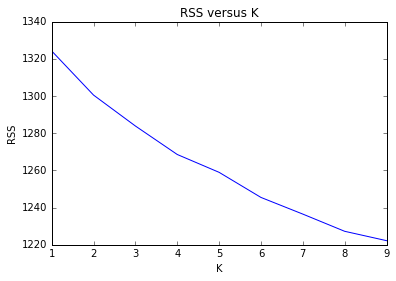

In [29]:
clusters = range(1, 10)

def kmean_score(cluster_qty):
    kmean = KMeans(cluster_qty)
    kmean.fit(X)
    rss = -kmean.score(X)
    return rss

scores = [kmean_score(i) for i in clusters]

plt.plot(range(1, 10), scores)
plt.xlabel('K')
plt.ylabel('RSS')
plt.title('RSS versus K');

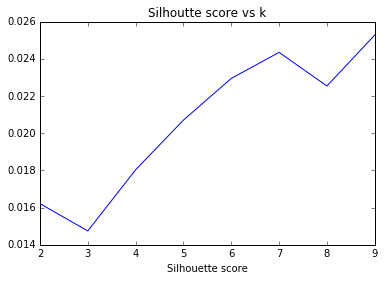

In [35]:
def silueta_score(cluster_qty):
    kmean = KMeans(cluster_qty)
    kmean.fit(X)
    silueta_avg = silhouette_score(X, kmean.labels_)
    centroids = kmean.cluster_centers_
    return silueta_avg

centroids = [silueta_score(i) for i in range(2, 10)]

plt.plot(range(2, 10), centroids)
plt.xlabel('k')
plt.xlabel('Silhouette score')
plt.title('Silhouette score vs k');


In [38]:
best_centroidsqty = np.argmax(centroids)
best_centroidsqty

7

In [39]:
km = KMeans(n_clusters=7)
km.fit_transform(X)

array([[ 1.03510435,  1.19479142,  0.95395792, ...,  1.01380414,
         1.09576285,  0.99889626],
       [ 1.02006781,  1.19222328,  1.05831761, ...,  1.03172586,
         0.95605708,  0.99963917],
       [ 1.02156259,  1.18645846,  1.05534922, ...,  1.02736966,
         1.06562023,  0.98019385],
       ..., 
       [ 0.88798245,  1.13449005,  1.04067088, ...,  1.01187766,
         1.06527912,  0.98079364],
       [ 0.97619073,  1.14703548,  0.99034977, ...,  0.94391297,
         1.01304821,  0.92523857],
       [ 0.99337852,  1.15161038,  0.99751107, ...,  0.96398187,
         0.9717845 ,  0.94515399]])

In [40]:
km.cluster_centers_

array([[ 0.01945145,  0.00729279,  0.01144263, ...,  0.00416592,
         0.0004799 ,  0.00368433],
       [ 0.00157093,  0.00075801,  0.00228322, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00736756,  0.0175212 ,  0.00434809, ...,  0.0026937 ,
         0.00159268,  0.00401188],
       ..., 
       [ 0.00983745,  0.02118392,  0.00283282, ...,  0.00059288,
         0.01328866,  0.00201711],
       [ 0.01303724,  0.00762261,  0.00303086, ...,  0.00031791,
         0.        ,  0.00112306],
       [ 0.01566013,  0.00753371,  0.00527272, ...,  0.00135053,
         0.00059442,  0.00096234]])

In [41]:
# Creating (7, 10) array, numpy.apply_along_axis(func1d, axis, arr, *args, **kwargs)
top_words = np.apply_along_axis(lambda x:np.argsort(x)[::-1][:10], 1, km.cluster_centers_)

In [42]:
top_words

array([[ 188,  803, 1772, 1881, 1228, 1134,  988, 1295,  811, 1586],
       [ 936, 1540,  937, 1215, 1217,  943, 1881, 1366, 1195, 1179],
       [ 770, 1579, 1790, 1330, 1023, 1988, 1990, 1328,  721,  372],
       [1297,  213,  803, 1279, 1096,  635, 1991, 1121, 1437,  395],
       [1171,  174, 1632, 1198, 1971, 1234, 1239, 1672, 1202,  475],
       [1497,  834,  869,  305,  803, 1637, 1014, 1217, 1598, 1981],
       [1991, 1716, 1198, 1981, 1234,  395, 1295,  447, 1606,  311]])

In [45]:
# names = vectorizing.get_feature_names()
for row in xrange(top_words.shape[0]):
    for column in xrange(top_words.shape[1]):
        print names[top_words[row, column]]
    print '==========='

attack
government
syria
united
official
military
killed
people
group
security
iran
rouhani
iranian
nuclear
obama
israel
united
president
netanyahu
nation
game
season
team
player
league
yankee
yard
play
first
coach
percent
bank
government
party
market
european
year
merkel
rate
company
music
art
show
new
work
one
opera
song
night
dance
republican
health
house
care
government
shutdown
law
obama
senate
would
year
state
new
would
one
company
people
court
sept
case
